In [42]:
import openai
from pathlib import Path
import json
import llm2geneset
import time
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("genes_overlap.tsv", sep="\t")

In [5]:
df.head()

,database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj
0,KEGG_2021_Human,gpt-3.5-turbo-0125,ABC transporters,45,13,12,0,0.923077,0.002267,4.938589e-32,1.580348e-29
1,KEGG_2021_Human,gpt-3.5-turbo-0125,AGE-RAGE signaling pathway in diabetic complic...,100,35,7,0,0.200000,0.005039,4.133373e-10,1.322679e-07
2,KEGG_2021_Human,gpt-3.5-turbo-0125,AMPK signaling pathway,120,27,14,0,0.518519,0.006047,8.155356e-25,2.609714e-22
3,KEGG_2021_Human,gpt-3.5-turbo-0125,Acute myeloid leukemia,67,11,6,0,0.545455,0.003376,5.475707e-13,1.752226e-10
4,KEGG_2021_Human,gpt-3.5-turbo-0125,Adherens junction,71,19,13,0,0.684211,0.003578,1.371074e-28,4.387436e-26


In [6]:
depth_root_dir = "libs_human/go_depth"

In [8]:
go_db=['GO_Cellular_Component_2023', 'GO_Cellular_Component_2023','GO_Cellular_Component_2023']

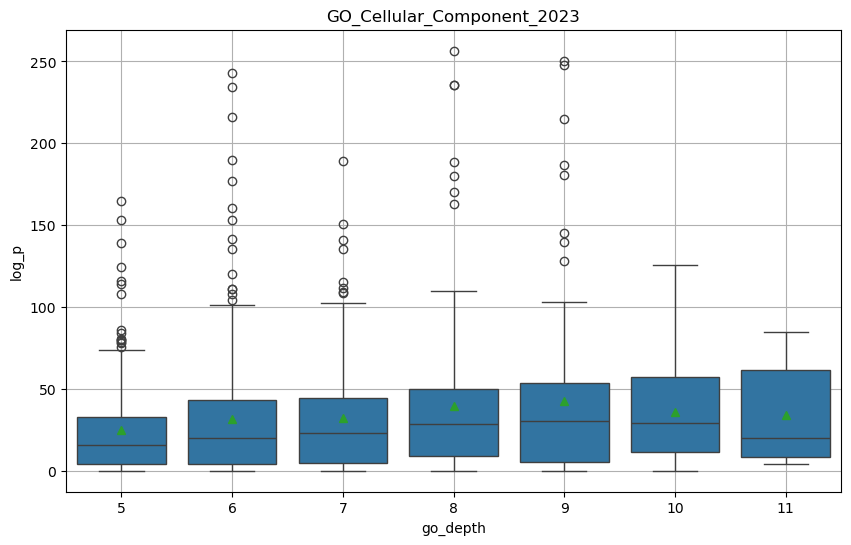

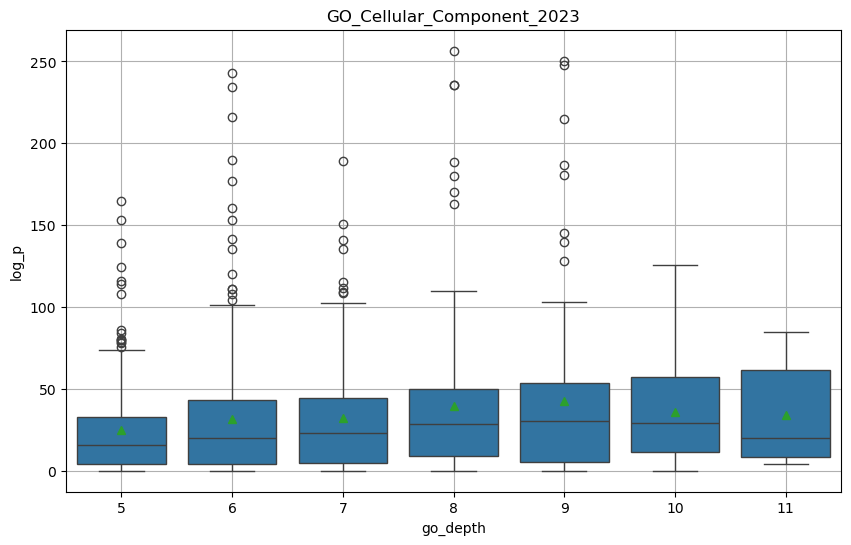

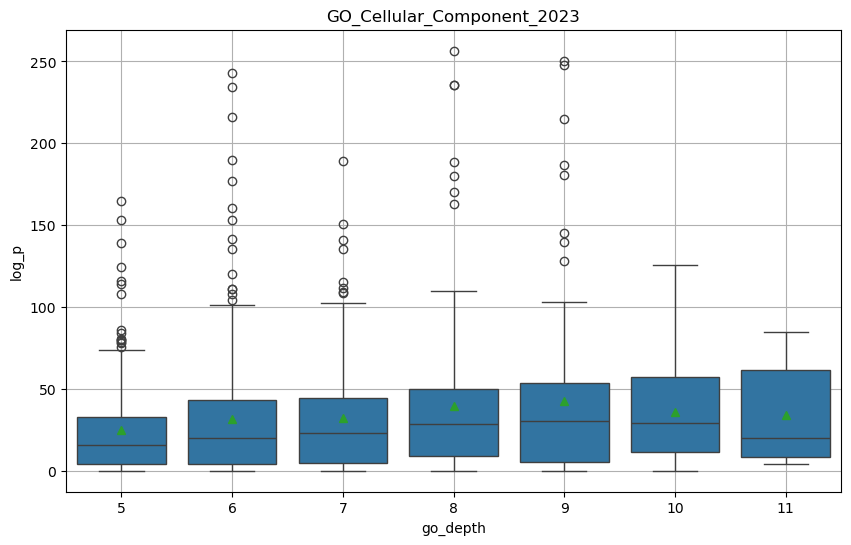

In [45]:
pattern = r'\(GO:\d+\)'

for db in go_db:
    path=os.path.join(depth_root_dir,db+'.txt')
    df_depth = pd.read_csv(path, sep="\t")
    df_sub = df[df.database==db]
    
    cleaned_term=[]
    for i in df_depth.term.values:
        cleaned_term.append(re.sub(pattern, '', i).strip())
    df_depth['descr']=cleaned_term
    df_merge = df_depth.merge(df_sub, on='descr')
    if len(df_merge)!= len(df_sub):
        print("merged dataframe has different size")
    df_merge['log_p']=-np.log(df_merge['p_val'])
    
    # Create a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='go_depth', y='log_p', data=df_merge, showmeans=True)
    
    # Add labels and title
    plt.xlabel('go_depth')
    plt.ylabel('log_p')
    plt.title(db)
    
    # Show plot
    plt.grid(True)
    plt.show()


In [48]:
df_merge.columns

Index(['term', 'go_id', 'go_depth', 'descr', 'database', 'model', 'ncurated',
       'nllm', 'ninter', 'ndup', 'generatio', 'bgratio', 'p_val', 'p_val_adj',
       'log_p'],
      dtype='object')

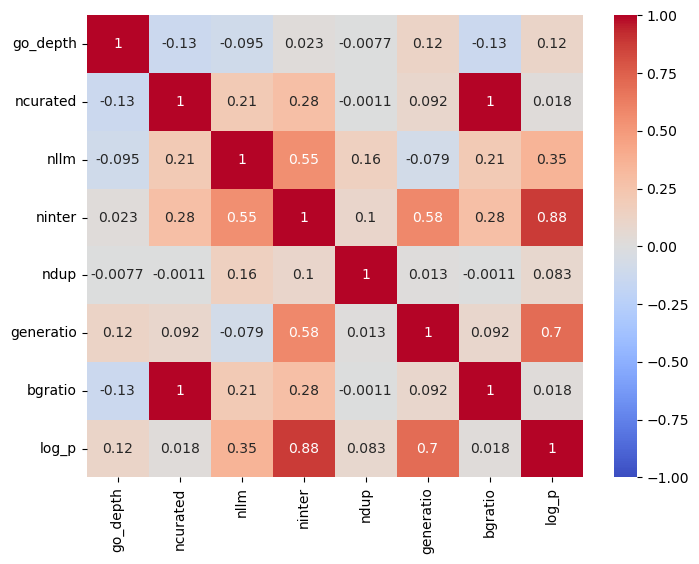

In [51]:
# Extract the columns of interest
df_heatmap = df_merge[['go_depth', 'ncurated', 'nllm', 'ninter','ndup', 'generatio','bgratio','log_p']]

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()